# INSTALLING LIBRARIES

In [1]:
!pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

# IMPORTING LIBRARIES

In [2]:
# Google Drive Integration
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import torch

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron  # Linear models
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier

# Deep learning model
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments # BERT-base-uncased


# LOADING DATASETS

In [18]:
# Load Datasets
roberta_df = pd.read_csv('/content/drive/MyDrive/Dissertation24/Labelled_Reviews.csv')
roberta_df.info()
df_unlabeled = pd.read_csv('/content/drive/MyDrive/Dissertation24/Testing_Reviews.csv')
df_unlabeled.info()

roberta_df_copy = roberta_df[['content', 'length', 'label']]
df_unlabeled_copy = df_unlabeled[['content', 'length']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38880 entries, 0 to 38879
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        38880 non-null  object
 1   score          38880 non-null  int64 
 2   at             38880 non-null  object
 3   source         38880 non-null  object
 4   length         38880 non-null  int64 
 5   label          38880 non-null  int64 
 6   probabilities  38880 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  9720 non-null   object
 1   score    9720 non-null   int64 
 2   at       9720 non-null   object
 3   source   9720 non-null   object
 4   length   9720 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 379.8+ KB


In [19]:
print("\nLabelled RoBERTa Dataframe:\n", roberta_df_copy.head())
print("\nUnlabelled Test Dataframe:\n", df_unlabeled_copy.head())


Labelled RoBERTa Dataframe:
                                              content  length  label
0                                          fantastic       9      2
1  recent update notification function working pr...     138      1
2  fantastic app noticed added cost ireland used ...      85      2
3  horrible experience ever got contacted deliver...     309      0
4  thre mediation fall asleep nice ability wake w...     139      0

Unlabelled Test Dataframe:
                                              content  length
0  ive revised rating two reason customer support...     275
1              go world news recent update ruined ui      37
2  ive using headspace age meditation excellent a...     258
3  amazing major city ive used san fran london ti...      89
4  love app using year find app cluttered maybe p...     171


In [21]:
# Define the label mapping
label_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}

# SPLITTING DATASET INTO TRAIN AND VALIDATION

In [22]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    roberta_df_copy['content'], roberta_df_copy['label'],
    test_size=0.2, random_state=42, stratify=roberta_df_copy['label']
)

# FEATURE EXTRACTION

## TF-IDF VECTORISATION

In [23]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform on the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the validation data
X_val_tfidf = tfidf.transform(X_val)

# Transform the test data
X_test_tfidf = tfidf.transform(df_unlabeled_copy['content'])

# TRADITIONAL MODEL TRAINING AND EVALUATION

## LOGISTICS REGRESSION

In [24]:
# Logistic Regression
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_tfidf, y_train)

# Predictions on the training data
y_train_pred_lr = logistic_regression_model.predict(X_train_tfidf)

# Predictions on the validation data
y_val_pred_lr = logistic_regression_model.predict(X_val_tfidf)

# Evaluate Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_val, y_val_pred_lr))

# Predictions on the test data
df_unlabeled_copy['Logistic_Regression_pred'] = logistic_regression_model.predict(X_test_tfidf)

# Display predictions
print("\nLogistic Regression Predictions on Unlabelled Data (First 5 rows):\n")
print(df_unlabeled_copy[['content', 'Logistic_Regression_pred']].head())



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3829
           1       0.64      0.38      0.48      1199
           2       0.85      0.88      0.86      2748

    accuracy                           0.82      7776
   macro avg       0.78      0.73      0.74      7776
weighted avg       0.81      0.82      0.81      7776


Logistic Regression Predictions on Unlabelled Data (First 5 rows):

                                             content  Logistic_Regression_pred
0  ive revised rating two reason customer support...                         0
1              go world news recent update ruined ui                         0
2  ive using headspace age meditation excellent a...                         0
3  amazing major city ive used san fran london ti...                         2
4  love app using year find app cluttered maybe p...                         2


<ipython-input-24-cc53eb946fd3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unlabeled_copy['Logistic_Regression_pred'] = logistic_regression_model.predict(X_test_tfidf)


<ipython-input-25-bde90cc7653b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unlabeled_copy['Logistic_Regression_pred'] = df_unlabeled_copy['Logistic_Regression_pred'].map(label_mapping)
<ipython-input-25-bde90cc7653b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Logistic_Regression_pred', data=df_unlabeled_copy, palette='viridis')


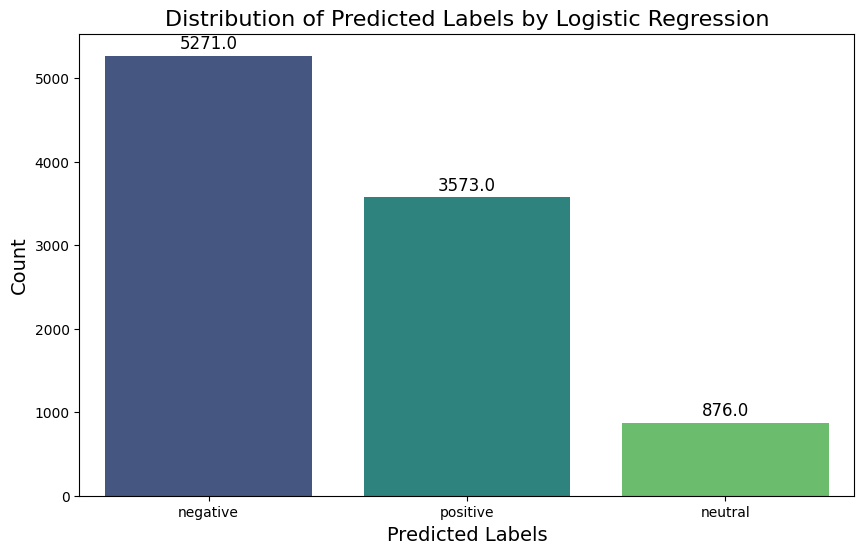

In [25]:
# Visualize the distribution of predicted labels
# Apply the mapping to the predicted labels
df_unlabeled_copy['Logistic_Regression_pred'] = df_unlabeled_copy['Logistic_Regression_pred'].map(label_mapping)

# Set up the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Logistic_Regression_pred', data=df_unlabeled_copy, palette='viridis')

# Add the count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add titles and labels
plt.title('Distribution of Predicted Labels by Logistic Regression', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

## LINEAR SUPPORT VECTOR MACHINE (SVM)

In [26]:
# Linear SVM
linear_svm_model = SVC(kernel='linear', C=1.0)
linear_svm_model.fit(X_train_tfidf, y_train)

# Predictions on the training data
y_train_pred_svm = linear_svm_model.predict(X_train_tfidf)

# Predictions on the validation data
y_val_pred_svm = linear_svm_model.predict(X_val_tfidf)

# Evaluate Linear SVM
print("\nLinear SVM Classification Report:")
print(classification_report(y_val, y_val_pred_svm))

# Predictions on the test data
df_unlabeled_copy['Linear_SVM_pred'] = linear_svm_model.predict(X_test_tfidf)

# Display predictions
print("\nLinear SVM Predictions on Unlabelled Data (First 5 rows):\n")
print(df_unlabeled_copy[['content', 'Linear_SVM_pred']].head())



Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3829
           1       0.61      0.41      0.49      1199
           2       0.85      0.87      0.86      2748

    accuracy                           0.82      7776
   macro avg       0.77      0.73      0.74      7776
weighted avg       0.81      0.82      0.81      7776


Linear SVM Predictions on Unlabelled Data (First 5 rows):

                                             content  Linear_SVM_pred
0  ive revised rating two reason customer support...                0
1              go world news recent update ruined ui                0
2  ive using headspace age meditation excellent a...                0
3  amazing major city ive used san fran london ti...                2
4  love app using year find app cluttered maybe p...                2


<ipython-input-26-db70aecc994d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unlabeled_copy['Linear_SVM_pred'] = linear_svm_model.predict(X_test_tfidf)


<ipython-input-27-192a344acab6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unlabeled_copy['Linear_SVM_pred'] = df_unlabeled_copy['Linear_SVM_pred'].map(label_mapping)
<ipython-input-27-192a344acab6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Linear_SVM_pred', data=df_unlabeled_copy, palette='viridis')


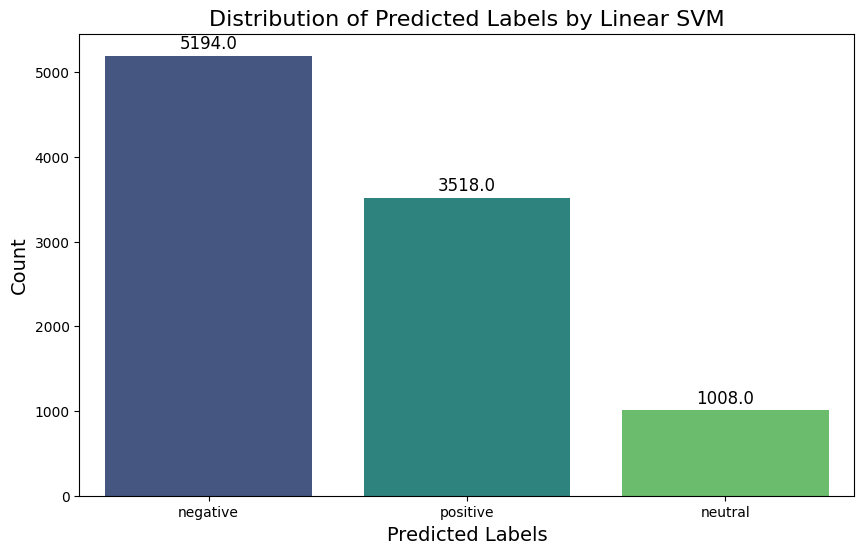

In [27]:
# Visualize the distribution of predicted labels
# Apply the mapping to the predicted labels
df_unlabeled_copy['Linear_SVM_pred'] = df_unlabeled_copy['Linear_SVM_pred'].map(label_mapping)

# Set up the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Linear_SVM_pred', data=df_unlabeled_copy, palette='viridis')

# Add the count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add titles and labels
plt.title('Distribution of Predicted Labels by Linear SVM', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

## PERCEPTRON

In [28]:
# Perceptron
perceptron_model = Perceptron(max_iter=1000)
perceptron_model.fit(X_train_tfidf, y_train)

# Predictions on the training data
y_train_pred_perceptron = perceptron_model.predict(X_train_tfidf)

# Predictions on the validation data
y_val_pred_perceptron = perceptron_model.predict(X_val_tfidf)

# Evaluate Perceptron
print("\nPerceptron Classification Report:")
print(classification_report(y_val, y_val_pred_perceptron))

# Predictions on the test data
df_unlabeled_copy['Perceptron_pred'] = perceptron_model.predict(X_test_tfidf)

# Display predictions
print("\nPerceptron Predictions on Unlabelled Data (First 5 rows):\n")
print(df_unlabeled_copy[['content', 'Perceptron_pred']].head())



Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      3829
           1       0.49      0.42      0.45      1199
           2       0.83      0.83      0.83      2748

    accuracy                           0.79      7776
   macro avg       0.72      0.71      0.71      7776
weighted avg       0.78      0.79      0.78      7776


Perceptron Predictions on Unlabelled Data (First 5 rows):

                                             content  Perceptron_pred
0  ive revised rating two reason customer support...                2
1              go world news recent update ruined ui                0
2  ive using headspace age meditation excellent a...                0
3  amazing major city ive used san fran london ti...                2
4  love app using year find app cluttered maybe p...                1


<ipython-input-29-54271ac83567>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Perceptron_pred', data=df_unlabeled_copy, palette='viridis')


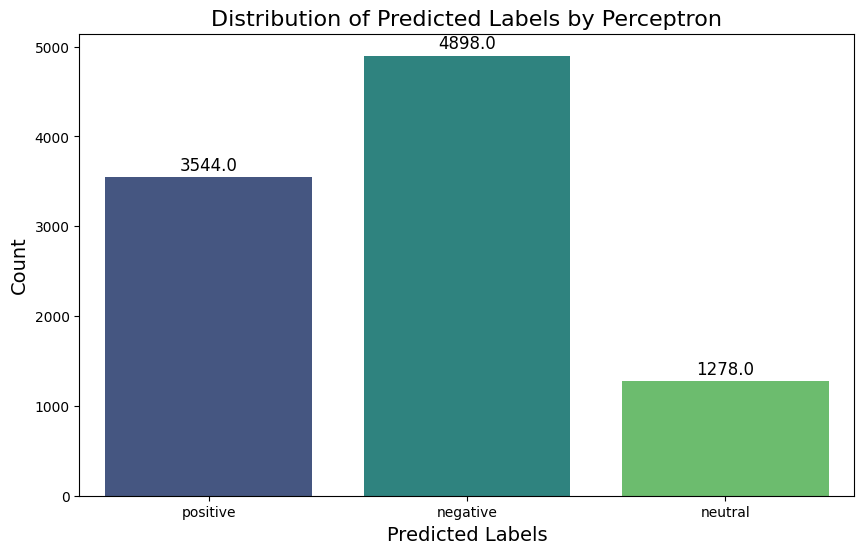

In [29]:
# Visualize the distribution of predicted labels
# Apply the mapping to the predicted labels
df_unlabeled_copy['Perceptron_pred'] = df_unlabeled_copy['Perceptron_pred'].map(label_mapping)

# Set up the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Perceptron_pred', data=df_unlabeled_copy, palette='viridis')

# Add the count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add titles and labels
plt.title('Distribution of Predicted Labels by Perceptron', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

## NAIVE BAYES

In [30]:
# Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

# Predictions on the training data
y_train_pred_nb = naive_bayes_model.predict(X_train_tfidf)

# Predictions on the validation data
y_val_pred_nb = naive_bayes_model.predict(X_val_tfidf)

# Evaluate Naive Bayes
print("\nNaive Bayes Classification Report:")
print(classification_report(y_val, y_val_pred_nb))

# Predictions on the test data
df_unlabeled_copy['Naive_Bayes_pred'] = naive_bayes_model.predict(X_test_tfidf)

# Display predictions
print("\nNaive Bayes Predictions on Unlabelled Data (First 5 rows):\n")
print(df_unlabeled_copy[['content', 'Naive_Bayes_pred']].head())


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      3829
           1       0.50      0.03      0.05      1199
           2       0.76      0.83      0.79      2748

    accuracy                           0.75      7776
   macro avg       0.67      0.59      0.56      7776
weighted avg       0.72      0.75      0.70      7776


Naive Bayes Predictions on Unlabelled Data (First 5 rows):

                                             content  Naive_Bayes_pred
0  ive revised rating two reason customer support...                 0
1              go world news recent update ruined ui                 0
2  ive using headspace age meditation excellent a...                 0
3  amazing major city ive used san fran london ti...                 2
4  love app using year find app cluttered maybe p...                 2


<ipython-input-31-9d7bcc00249e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Naive_Bayes_pred', data=df_unlabeled_copy, palette='viridis')


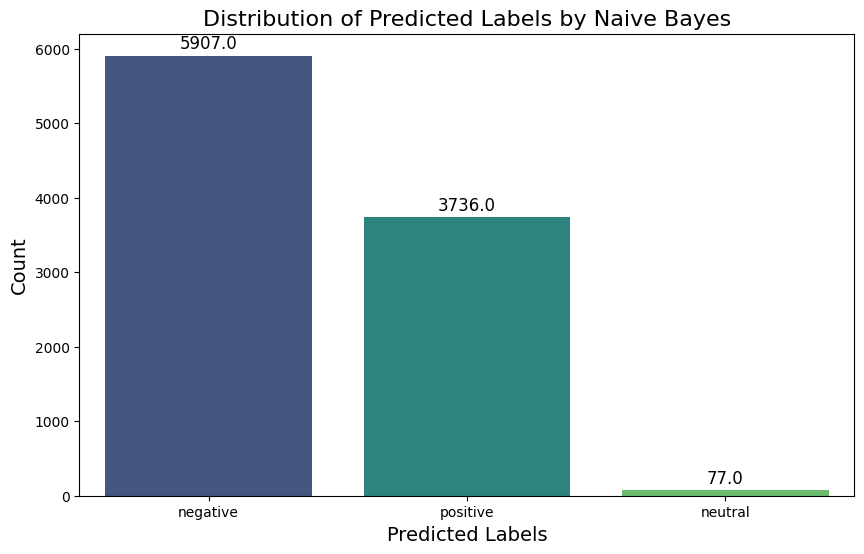

In [31]:
# Visualize the distribution of predicted labels
# Apply the mapping to the predicted labels
df_unlabeled_copy['Naive_Bayes_pred'] = df_unlabeled_copy['Naive_Bayes_pred'].map(label_mapping)

# Set up the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Naive_Bayes_pred', data=df_unlabeled_copy, palette='viridis')

# Add the count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add titles and labels
plt.title('Distribution of Predicted Labels by Naive Bayes', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

# BIDIRECTIONAL ENCODER REPRESENTATIONS FROM TRANSFORMERS (BERT-BASE-UNCASED)

In [33]:
# Train-validation split
train_df, val_df = train_test_split(roberta_df, test_size=0.2, random_state=42, stratify=roberta_df['label'])


In [34]:
# Initialize the tokenizer for BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define a function to tokenize the data
def tokenize_data(text, tokenizer, max_length=512):
    return tokenizer(text, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')

# Tokenize the training and validation datasets
train_df['input_ids'] = train_df['content'].apply(lambda x: tokenize_data(x, tokenizer)['input_ids'].squeeze(0).tolist())
train_df['attention_mask'] = train_df['content'].apply(lambda x: tokenize_data(x, tokenizer)['attention_mask'].squeeze(0).tolist())

val_df['input_ids'] = val_df['content'].apply(lambda x: tokenize_data(x, tokenizer)['input_ids'].squeeze(0).tolist())
val_df['attention_mask'] = val_df['content'].apply(lambda x: tokenize_data(x, tokenizer)['attention_mask'].squeeze(0).tolist())

# Tokenize the unlabeled data
df_unlabeled['input_ids'] = df_unlabeled['content'].apply(lambda x: tokenize_data(x, tokenizer)['input_ids'].squeeze(0).tolist())
df_unlabeled['attention_mask'] = df_unlabeled['content'].apply(lambda x: tokenize_data(x, tokenizer)['attention_mask'].squeeze(0).tolist())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [35]:
# Define a PyTorch dataset
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, has_labels=True):
        self.input_ids = dataframe['input_ids'].tolist()
        self.attention_mask = dataframe['attention_mask'].tolist()
        self.has_labels = has_labels
        if self.has_labels:
            self.labels = dataframe['label'].tolist()

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        item = {
            'input_ids': torch.tensor(self.input_ids[idx], dtype=torch.long).clone().detach(),
            'attention_mask': torch.tensor(self.attention_mask[idx], dtype=torch.long).clone().detach()
        }
        if self.has_labels:
            item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long).clone().detach()
        return item

# Create datasets
train_dataset = ReviewDataset(train_df)
val_dataset = ReviewDataset(val_df)
test_dataset = ReviewDataset(df_unlabeled, has_labels=False)

In [36]:
# Define metrics for evaluation
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


In [37]:
# Initialize the BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(roberta_df['label'].unique()))


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
# Set up the Trainer
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=200,
    eval_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)


In [39]:
# Train the model
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.348500,0.311396,0.878086,0.873449,0.873313,0.878086


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.348500,0.311396,0.878086,0.873449,0.873313,0.878086
2,0.227700,0.368983,0.881301,0.880522,0.882273,0.881301
3,0.088300,0.495825,0.896605,0.894765,0.893744,0.896605


TrainOutput(global_step=5832, training_loss=0.25503089872734375, metrics={'train_runtime': 9348.702, 'train_samples_per_second': 9.981, 'train_steps_per_second': 0.624, 'total_flos': 2.4551639235035136e+16, 'train_loss': 0.25503089872734375, 'epoch': 3.0})

In [47]:
# Evaluate the model
trainer.evaluate()


{'eval_loss': 0.4958248734474182,
 'eval_accuracy': 0.8966049382716049,
 'eval_f1': 0.8947652907808845,
 'eval_precision': 0.8937437578652079,
 'eval_recall': 0.8966049382716049,
 'eval_runtime': 235.2239,
 'eval_samples_per_second': 33.058,
 'eval_steps_per_second': 2.066,
 'epoch': 3.0}

In [52]:
# Make predictions
predictions = trainer.predict(test_dataset)
df_unlabeled_copy['BERT_pred'] = predictions.predictions.argmax(-1)


In [53]:
# Reverse mapping dictionary
reverse_label_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}

# Map the numerical predictions to string labels
df_unlabeled_copy['BERT_pred'] = df_unlabeled_copy['BERT_pred'].map(reverse_label_mapping)


In [54]:
# Display predictions
print("\nBERT Predictions on Unlabelled Data (First 5 rows):\n")
print(df_unlabeled_copy[['content', 'BERT_pred']].head())



BERT Predictions on Unlabelled Data (First 5 rows):

                                             content BERT_pred
0  ive revised rating two reason customer support...  negative
1              go world news recent update ruined ui  negative
2  ive using headspace age meditation excellent a...  negative
3  amazing major city ive used san fran london ti...  positive
4  love app using year find app cluttered maybe p...  positive


<ipython-input-55-6dbf028e8c1e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='BERT_pred', data=df_unlabeled_copy, palette='viridis')


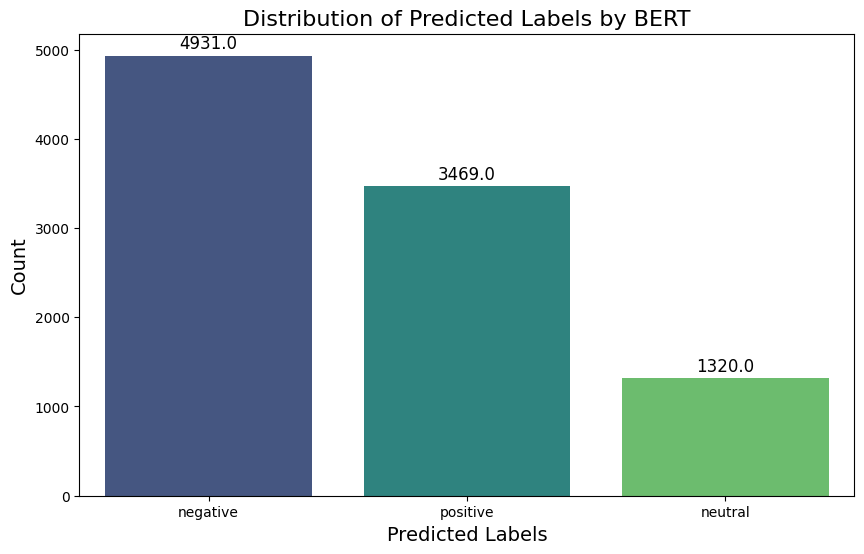

In [55]:
# Visualize the distribution of predicted labels
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='BERT_pred', data=df_unlabeled_copy, palette='viridis')

# Add the count annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Predicted Labels by BERT', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


# SAVING THE PREDICTIONS

In [56]:
df_unlabeled_copy

,content,length,Logistic_Regression_pred,Linear_SVM_pred,Perceptron_pred,Naive_Bayes_pred,BERT_pred
0,ive revised rating two reason customer support...,275,negative,negative,positive,negative,negative
1,go world news recent update ruined ui,37,negative,negative,negative,negative,negative
2,ive using headspace age meditation excellent a...,258,negative,negative,negative,negative,negative
3,amazing major city ive used san fran london ti...,89,positive,positive,positive,positive,positive
4,love app using year find app cluttered maybe p...,171,positive,positive,neutral,positive,positive
...,...,...,...,...,...,...,...
9715,excellent card useful like need pay various cu...,306,positive,positive,neutral,positive,positive
9716,accurate quick reliable,23,neutral,neutral,positive,positive,neutral
9717,keep crashing lacking feature,29,negative,negative,negative,negative,negative
9718,changing design app made much worse switch dar...,192,negative,negative,negative,negative,negative


In [57]:
df_unlabeled_copy.to_csv('/content/drive/MyDrive/Dissertation24/Baseline_RobertaPredictions.csv', index=False)
print("Reviews have been saved to Baseline_RobertPredictions.csv")

Reviews have been saved to Baseline_RobertPredictions.csv
